In [19]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('train.csv')

In [20]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [21]:
print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


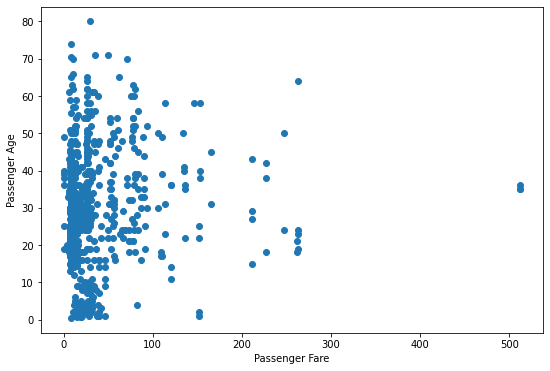

In [22]:
plt.subplots(figsize=(9,6))
plt.scatter(x= titanic['Fare'], y= titanic['Age'] , cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
#plt.savefig('initial_clusters', bpi=150)

In [23]:
# Calculate Euclidean distance between two observations
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i]))
            
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] 
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [24]:
k = 2
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
print("initial centroids" ,centroids)
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
#print("initial clusters" ,initial_clusters)
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(10):
    centroids = calc_centroids(clusters, cluster_array)
    print("centroids" , centroids)
    clusters = assign_clusters(centroids, cluster_array)
    #print("clusters" , clusters)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

initial centroids [array([ 0., 36.]), array([ 0., 38.])]
0 1019748
centroids [0    31.853952
1    22.929981
dtype: float64, 0    42.642044
1    48.638298
dtype: float64]
1 752853
centroids [0    16.189776
1    24.278713
dtype: float64, 0    79.406918
1    42.796268
dtype: float64]
2 570754
centroids [0    16.210801
1    28.327962
dtype: float64, 0    110.477739
1     35.320857
dtype: float64]
3 521926
centroids [0    18.484849
1    28.864344
dtype: float64, 0    129.770432
1     34.595385
dtype: float64]
4 509498
centroids [0    19.712513
1    28.965200
dtype: float64, 0    139.905196
1     34.853034
dtype: float64]
5 498668
centroids [0    21.160036
1    29.234399
dtype: float64, 0    153.538353
1     33.779726
dtype: float64]
6 476392
centroids [0    22.650285
1    29.446347
dtype: float64, 0    173.520102
1     32.612632
dtype: float64]
7 460751
centroids [0    23.572823
1    29.536411
dtype: float64, 0    189.007983
1     31.956667
dtype: float64]
8 460751
centroids [0    23.572823

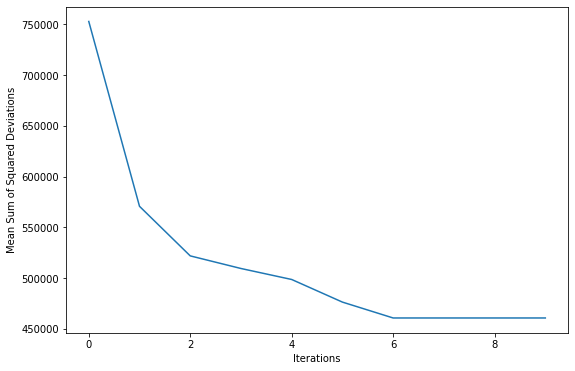

In [25]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
#plt.savefig('mean_ssd', bpi=150)

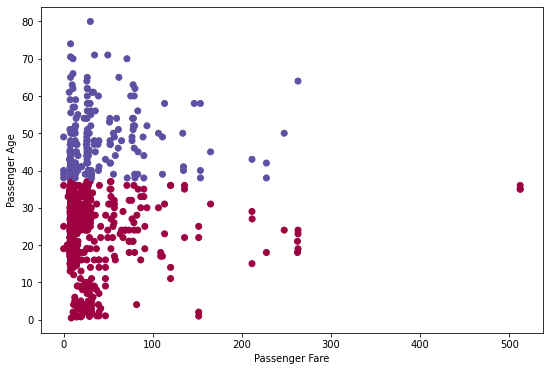

In [26]:

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
#plt.savefig('initial_clusters', bpi=150)

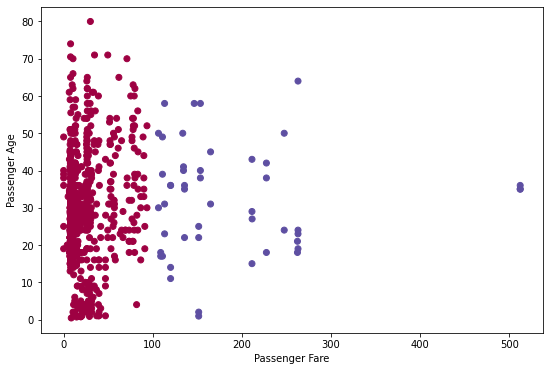

In [27]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
#plt.savefig('final_clusters', bpi=150)